In [44]:
import networkx as nx
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def random_graph(N, p):
    """
        Function to generate a random graph. 
        
        Args:
            N - number of nodes (int),
            p - probability of connecting two nodes (number from 0 to 1).
    """
    
    assert type(N) == int
    assert (type(p) == int or type(p) == float)
    assert 0 <= p <= 1
    
    nodes = list(range(N))
    pairs = list(combinations(nodes, 2))
    num = len(pairs)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for i in range(num):
        pair = pairs[i]
        q = np.random.uniform()
        if q < p:
            G.add_edge(*pair)
    return G

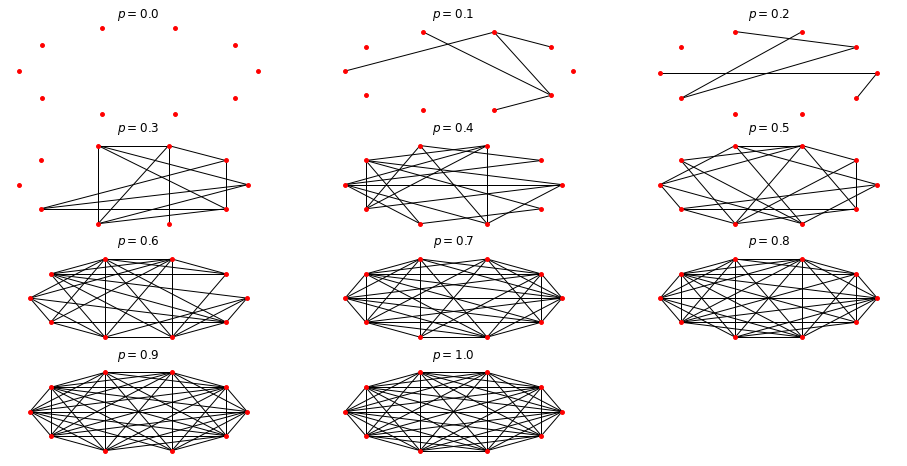

In [75]:
ps = [round(0.1 * i, 1) for i in range(11)]
plt.figure(figsize=(16,8))
for i in range(len(ps)):
    plt.subplot(4, 3, i+1)
    g = random_graph(10, ps[i])
    plt.title(f"$p = {ps[i]}$")
    nx.draw_circular(g, node_size=15, node_color='red')

In [37]:
def watts_strogatz(N, p, K):
    """
        Function to generate Watts-Strogartz graph. 

        Args:
            N - number of nodes (int),
            p - probability of rewiring a connection (int or float from 0 to 1),
            K - initial number of neighbours for each node (int), must be an even number.
    """

    assert type(N) == int
    assert (type(p) == int or type(p) == float)
    assert 0 <= p <= 1
    assert type(K) == int
    assert K % 2 == 0
    
    one_side = int(K/2 + 1)
    G = nx.circulant_graph(N, list(range(1, one_side))) # K must be even!!!
    nodes = list(G.nodes())
    for i in range(N):
        node = nodes[i]
        for j in range(1, one_side):
            q = np.random.uniform()
            if q < p:
                next_node = nodes[(i + j) % N]
                forbidden = [j for j in G.neighbors(node)] + [node]
                possible = [j for j in nodes if j not in forbidden]
                G.remove_edge(node, next_node)
                new = np.random.choice(possible)
                G.add_edge(node, new)
    return G

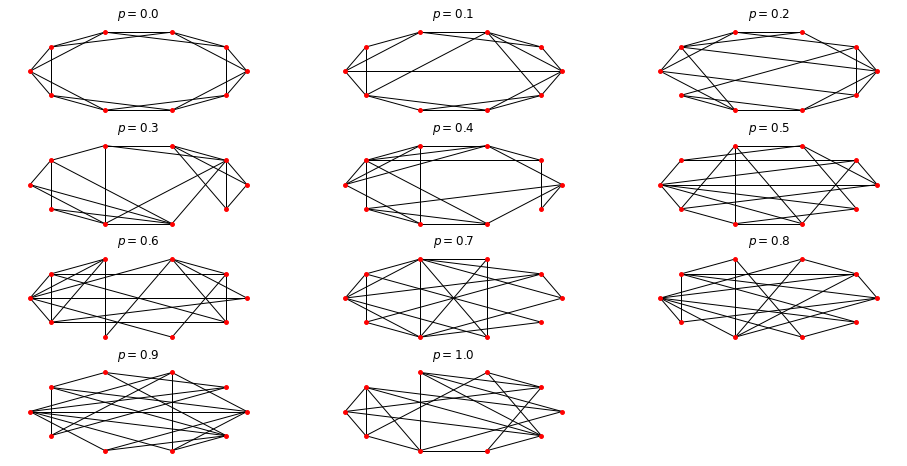

In [74]:
ps = [round(0.1 * i, 1) for i in range(11)]
plt.figure(figsize=(16,8))
for i in range(len(ps)):
    plt.subplot(4, 3, i+1)
    g = watts_strogatz(10, ps[i], 4)
    plt.title(f"$p = {ps[i]}$")
    nx.draw_circular(g, node_size=15, node_color='red')